# Tutorial - Step5 : MTMR evaluation by comparing to SOTA models

## 1. Import requirements

In [1]:
import os
import pandas as pd
import tqdm
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from MTMR.evaluate import evaluate_metric

## 2. Specify a target property

In [3]:
PROPERTY_NAME = "qed"

## 3. Set directories (for inputs and outputs)

In [4]:
input_data_dir = os.path.join("DATA", PROPERTY_NAME)
input_our_dir = os.path.join("outputs_Tutorial_4_MTMR_translation-Copy1", PROPERTY_NAME)
input_base_dir = os.path.join("DATA", "baselines")

In [5]:
_output_dir = "outputs_Tutorial_5_MTMR_evaluation-Copy1"
if not os.path.exists(_output_dir):
    os.mkdir(_output_dir)

output_dir = os.path.join(_output_dir, PROPERTY_NAME)
if not os.path.exists(output_dir):
    os.mkdir(output_dir)

## 4. Set file names

In [6]:
filepath_train_rdkit = os.path.join(input_data_dir, "rdkit_train_pairs.txt")

In [7]:
df_pairs_rdkit = pd.read_csv(filepath_train_rdkit, header=None, sep=" ")
targets_rdkit = set(df_pairs_rdkit.iloc[:,1].values.tolist())

In [8]:
filepath_MTMR  = os.path.join(input_our_dir,  f"MTMR_{PROPERTY_NAME.upper()}.csv")
filepath_JTVAE = os.path.join(input_base_dir, f"JTVAE_{PROPERTY_NAME.upper()}.csv")
filepath_G2G   = os.path.join(input_base_dir, f"VJTNN_{PROPERTY_NAME.upper()}.csv")
filepath_CORE  = os.path.join(input_base_dir, f"CORE_{PROPERTY_NAME.upper()}.csv")
filepath_G2GG  = os.path.join(input_base_dir, f"VJTNN+GAN_{PROPERTY_NAME.upper()}.csv")
filepath_MOLCG = os.path.join(input_base_dir, f"MOLCG_{PROPERTY_NAME.upper()}.csv")
filepath_HIER  = os.path.join(input_base_dir, f"HierG2G_{PROPERTY_NAME.upper()}.csv")
filepath_UGMMT = os.path.join(input_base_dir, f"UGMMT_{PROPERTY_NAME.upper()}.csv")

## 5. Load translation results generated from the test dataset

In [9]:
df_MTMR  = pd.read_csv(filepath_MTMR,  header=None).fillna("").rename(columns={0:"SOURCE", 1:"TARGET", 2:"SIMILARITY", 3:"PROPERTY"})
df_JTVAE = pd.read_csv(filepath_JTVAE, header=None).fillna("").rename(columns={0:"SOURCE", 1:"TARGET", 2:"SIMILARITY", 3:"PROPERTY"})
df_G2G   = pd.read_csv(filepath_G2G,   header=None).fillna("").rename(columns={0:"SOURCE", 1:"TARGET", 2:"SIMILARITY", 3:"PROPERTY"})
df_CORE  = pd.read_csv(filepath_CORE,  header=None).fillna("").rename(columns={0:"SOURCE", 1:"TARGET", 2:"SIMILARITY", 3:"PROPERTY"})
df_G2GG  = pd.read_csv(filepath_G2GG,  header=None).fillna("").rename(columns={0:"SOURCE", 1:"TARGET", 2:"SIMILARITY", 3:"PROPERTY"})
df_HIER  = pd.read_csv(filepath_HIER,  header=None).fillna("").rename(columns={0:"SOURCE", 1:"TARGET", 2:"SIMILARITY", 3:"PROPERTY"})
df_MOLCG = pd.read_csv(filepath_MOLCG, header=None).fillna("").rename(columns={0:"SOURCE", 1:"TARGET", 2:"SIMILARITY", 3:"PROPERTY"})
df_UGMMT = pd.read_csv(filepath_UGMMT, header=None).fillna("").rename(columns={0:"SOURCE", 1:"TARGET", 2:"SIMILARITY", 3:"PROPERTY"})

## 6. Evaluate metrics

In [10]:
frames = []

for i, (name, df) in enumerate([('MTMR', df_MTMR),
                                ('JTVAE', df_JTVAE),
                                ('VJTNN', df_G2G),
                                ('VJTNN+GAN', df_G2GG),
                                ('CORE', df_CORE),
                                ('HierG2G', df_HIER),
                                ('MolCycleGAN', df_MOLCG),
                                ('UGMMT', df_UGMMT)]):
    print(f"NOW: {i}")
    df_metric = evaluate_metric(df, targets_rdkit, num_decode=20, sample_size=10, start_idx=10,
                                threshold_sim=0.4,
                                threshold_pro=0.9).rename(columns={0:name})

    frames.append(df_metric)

NOW: 0
NOW: 1
NOW: 2
NOW: 3
NOW: 4
NOW: 5
NOW: 6
NOW: 7


In [11]:
df_merged = pd.concat(frames, axis=1).T

In [12]:
df_merged

,VALID_RATIO,AVERAGE_PROPERTY,AVERAGE_SIMILARITY,NOVELTY,SUCCESS,SUCCESS_WO_NOVEL,DIVERSITY
MTMR,0.99875,0.888563,0.293465,0.99875,0.25125,0.25125,0.707921
JTVAE,0.87875,0.696589,0.421021,0.87875,0.08500,0.08500,0.087875
VJTNN,1.00000,0.903547,0.307252,1.00000,0.45625,0.48125,0.860920
VJTNN+GAN,1.00000,0.898226,0.312207,1.00000,0.47250,0.50000,0.880755
CORE,1.00000,0.898913,0.317184,1.00000,0.50500,0.52250,0.895010
HierG2G,0.96125,0.858763,0.270348,0.96125,0.37875,0.38875,0.892597
MolCycleGAN,0.96500,0.755825,0.269082,0.96500,0.01250,0.01250,0.096500
UGMMT,0.99125,0.845335,0.329815,0.99125,0.23000,0.23375,0.708812


In [13]:
df_merged.to_csv(os.path.join(output_dir, "table_metrics.csv"))

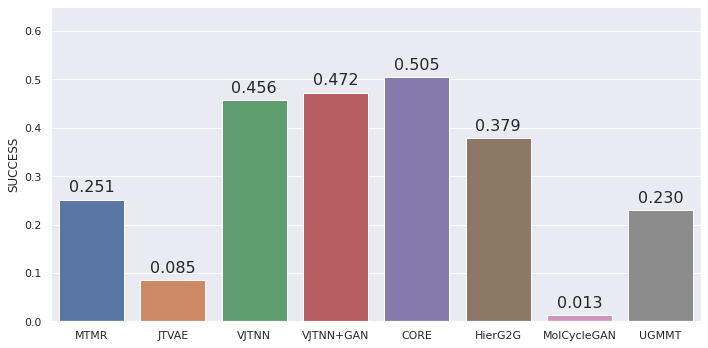

In [14]:
sns.set_theme(style='darkgrid')

fig, ax = plt.subplots(1,1,figsize=(10,5))

#_ = sns.barplot(x=df_merged.index, y=df_merged["SUCCESS"], ax=ax)
_ = sns.barplot(data=df_merged.reset_index(), x='index', y="SUCCESS", ax=ax)

for container in ax.containers:
    for i, bar in enumerate(container.get_children()):
        posx = i
        posy = bar.get_height() + 0.01
        ax.text(posx, posy, f"{bar.get_height():.3f}", rotation=0, ha='center', va='bottom', fontsize=16)

ax.set_xlabel(None)
ax.set_ylim(None, 0.65)
        
plt.tight_layout()
plt.savefig(os.path.join(output_dir, "barplot_success.png"), dpi=300)